# One Dimensional Visualisation

Data from https://openflights.org/data.html

- Airports
- Airlines
- Routes

### Airports

- *Airport ID*: Unique OpenFlights identifier for this airport.
- *Name*:       Name of airport. May or may not contain the City name.
- *City*:	    Main city served by airport. May be spelled differently from Name.
- *Country*:    Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
- *IATA*:	    3-letter IATA code. Null if not assigned/unknown.
- *ICAO*: 	    4-letter ICAO code. Null if not assigned.
- *Latitude*:   Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- *Longitude*:	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- *Altitude:	In feet.
- *Timezone*:	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- *DST*:    	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- *Tz*:         database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
- *Type*: 	    Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
- *Source*: "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

### Airlines

- *Airline ID*:	Unique OpenFlights identifier for this airline.
- *Name*:	Name of the airline.
- *Alias*:	Alias of the airline. For example, All Nippon Airways is commonly known as "ANA".
- *IATA*:	2-letter IATA code, if available.
- *ICAO*: 	3-letter ICAO code, if available.
- *Callsign*:	Airline callsign.
- *Country*:	Country or territory where airline is incorporated.
- *Active*:	"Y" if the airline is or has until recently been operational, "N" if it is defunct. This field is not reliable: in particular, major airlines that stopped flying long ago, but have not had their IATA code reassigned (eg. Ansett/AN), will incorrectly show as "Y"


### Routes

- *Airline*:	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- *Airline ID*:	Unique OpenFlights identifier for airline (see Airline).
- *Source airport*:	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- *Source airport ID*:	Unique OpenFlights identifier for source airport (see Airport)
- *Destination airport*:	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- *Destination airport ID*:	Unique OpenFlights identifier for destination airport (see Airport)
- *Codeshare*	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
- *Stops*:	Number of stops on this flight ("0" for direct)
- *Equipment*:	3-letter codes for plane type(s) generally used on this flight, separated by spaces


## Acquire the Data

In [90]:
import pandas as pd

In [121]:
# Read in the airports data.
airports = pd.read_csv("../data/airports.dat.txt", header=None, na_values=['\\N'], dtype=str)

# Read in the airlines data.
airlines = pd.read_csv("../data/airlines.dat.txt", header=None, na_values=['\\N'], dtype=str)

# Read in the routes data.
routes = pd.read_csv("../data/routes.dat.txt", header=None, na_values=['\\N'], dtype=str)


Assign column headers to the dataframe

In [122]:
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", 
                    "longitude", "altitude", "offset", "dst", "timezone", "type", "source"]

airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

routes.columns = ["airline", "airline_id", "source", "source_id", "dest",
                  "dest_id", "codeshare", "stops", "equipment"]


In [123]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [124]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,NaN,-,NaN,NaN,NaN,Y
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N


In [125]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


## Refine the Data 

In [126]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports


### Clean Rows & Columns

Lets start by dropping redundant columns - in `airports` data frame, we don't need `type`, `source`

In [127]:
airports.drop(['type', 'source'], axis=1, inplace=True)

In [128]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby


In [129]:
airports.shape

(7184, 12)

Lets start by dropping redundant rows - in `airlines` data frame, we don't need `id = -1`

In [130]:
airlines.drop(0, axis=0, inplace=True)

In [131]:
airlines.shape

(6161, 8)

In [132]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,NaN,NaN,TFU,NaN,Russia,N


### Check for Consistency

- All routes have an airline_id which is in the airline dataset
- All routes have an source_id and dest_id which is in the airport dataset

In [133]:
def checkConsistency (s1, s2):
    true_count = s1.isin(s2).sum()
    total_count = s1.count()
    consistency = true_count / total_count
    
    return consistency

In [134]:
not(routes.airline_id.isin(airlines.id))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [115]:
??missing

Object `missing` not found.


In [104]:
checkConsistency(routes.airline_id, airlines.id)

0.99292079866396699

In [105]:
checkConsistency(routes.source_id, airports.id)

0.98751163856169544

In [106]:
checkConsistency(routes.dest_id, airports.id)

0.98745252205784551

## Remove missing values

Lets remove routes where there is no airline_id provided to us

In [135]:
import missingno as msno
%matplotlib inline

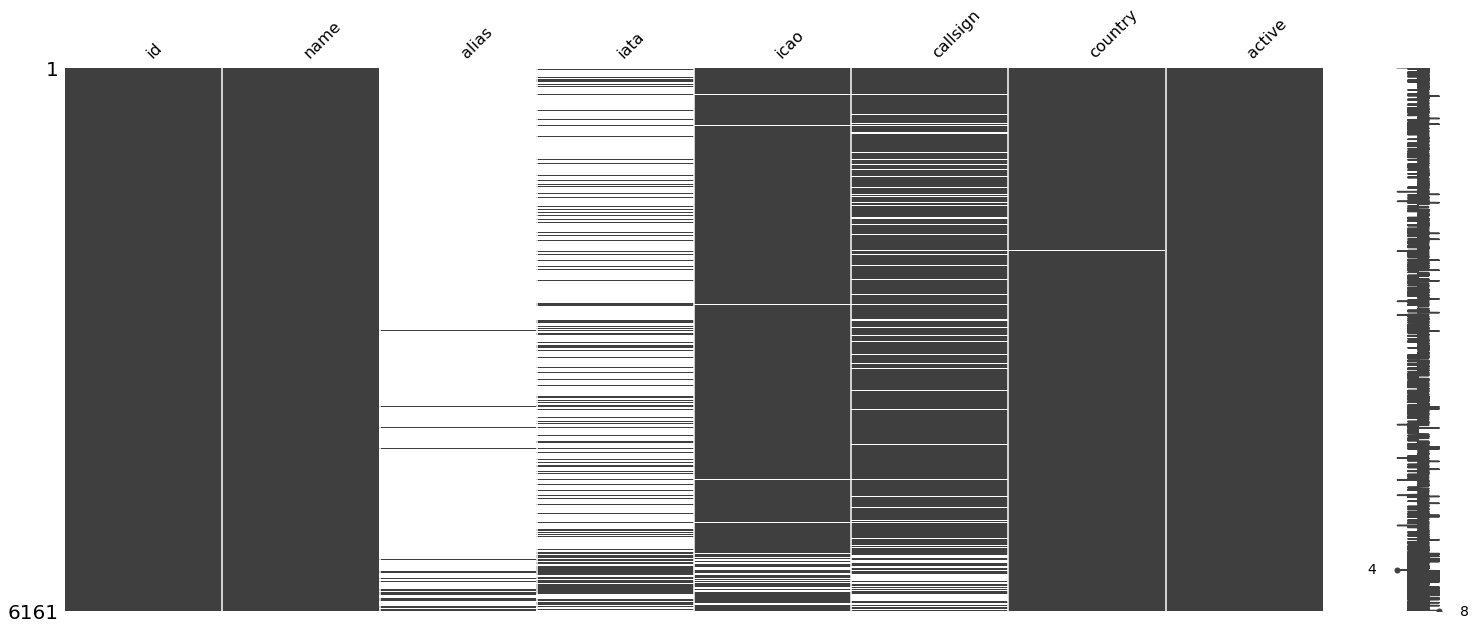

In [136]:
msno.matrix(airlines)

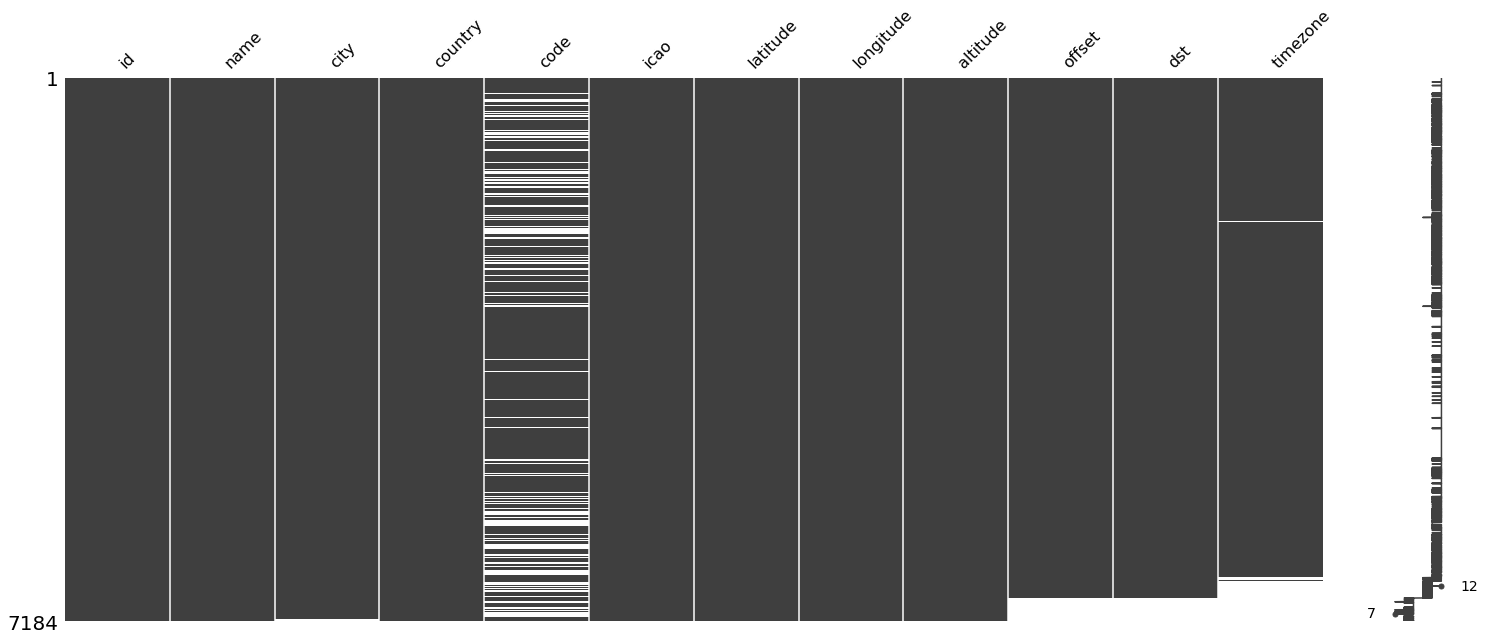

In [137]:
msno.matrix(airports)

In [88]:
routes[routes["airline_id"] == "\\N"].count()

airline       0
airline_id    0
source        0
source_id     0
dest          0
dest_id       0
codeshare     0
stops         0
equipment     0
dtype: int64

In [89]:
routes = routes[routes["airline_id"] != "\\N"]
routes.shape

(67184, 9)

## Transform